In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/DeepLearning/detection_fruit_projet/

Mounted at /content/drive
/content/drive/MyDrive/DeepLearning/detection_fruit_projet


In [ ]:
%ls

deep_learning_fruit_detection_model.ipynb  model_fruit_detection.h5  test_zip/  train_zip/


#imports

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import load_model

In [ ]:
np.random.seed(1)

shape = (200,200)

In [ ]:
train_data = '/content/drive/MyDrive/DeepLearning/detection_fruit_projet/train_zip/train'
train_images = []
train_labels = []
for filename in os.listdir(train_data):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_data,filename))


        train_labels.append(filename.split('_')[0])


        img = cv2.resize(img,shape)

        train_images.append(img)
#one hot encoding operations: each label will be presented as [1 0 0 0]: (0)apple, [0 1 0 0]: (1) banana , [0 0 1 0] (2) mixed, [0 0 0 1] (3) orange
train_labels = pd.get_dummies(train_labels).values


train_images = np.array(train_images)


x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

#lets process test data

In [ ]:
test_images = []
test_labels = []
shape = (200,200)
test_path = '/content/drive/MyDrive/DeepLearning/detection_fruit_projet/test_zip/test'

for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))# Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('_')[0])


        img = cv2.resize(img,shape)

        test_images.append(img)


test_images = np.array(test_images)

[0 0 0 1]


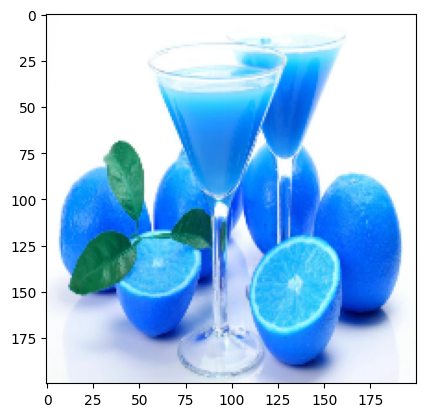

In [ ]:
print(train_labels[239])
plt.imshow(train_images[239])

#lets create a CNN model

In [ ]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(Flatten())
model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))

model.compile(
              loss='categorical_crossentropy',
              metrics=['acc'],
              optimizer='adam'
             )

In [ ]:
history = tf.keras.callbacks.History()

In [ ]:
history = model.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_val,y_val))

Epoch 1/20
3/3 [==============================] - 2s 263ms/step - loss: 4.5631 - acc: 0.2333 - val_loss: 11.8799 - val_acc: 0.0833
Epoch 2/20
3/3 [==============================] - 0s 129ms/step - loss: 8.9284 - acc: 0.2222 - val_loss: 2.7449 - val_acc: 0.2167
Epoch 3/20
3/3 [==============================] - 0s 130ms/step - loss: 2.6372 - acc: 0.2833 - val_loss: 1.5752 - val_acc: 0.3500
Epoch 4/20
3/3 [==============================] - 0s 129ms/step - loss: 1.6889 - acc: 0.4444 - val_loss: 1.3126 - val_acc: 0.5167
Epoch 5/20
3/3 [==============================] - 0s 128ms/step - loss: 1.1319 - acc: 0.5944 - val_loss: 1.0539 - val_acc: 0.5333
Epoch 6/20
3/3 [==============================] - 0s 128ms/step - loss: 1.0884 - acc: 0.5778 - val_loss: 1.2107 - val_acc: 0.5000
Epoch 7/20
3/3 [==============================] - 0s 126ms/step - loss: 1.0275 - acc: 0.6333 - val_loss: 0.9120 - val_acc: 0.6500
Epoch 8/20
3/3 [==============================] - 0s 127ms/step - loss: 0.9177 - acc: 0.6

In [ ]:
def plot_training_validation(history):
  plt.figure(figsize=(15, 6))
  plt.subplot(121)

  plt.plot(history.history['loss'],'-r',label = 'training')
  plt.plot(history.history['val_loss'],'-b', label='Validation')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend() ,
  plt.subplot(122)
  plt.plot(history.history['acc'],'-r', label='Training')
  plt.plot(history.history['val_acc'], '-b', label='Validation')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

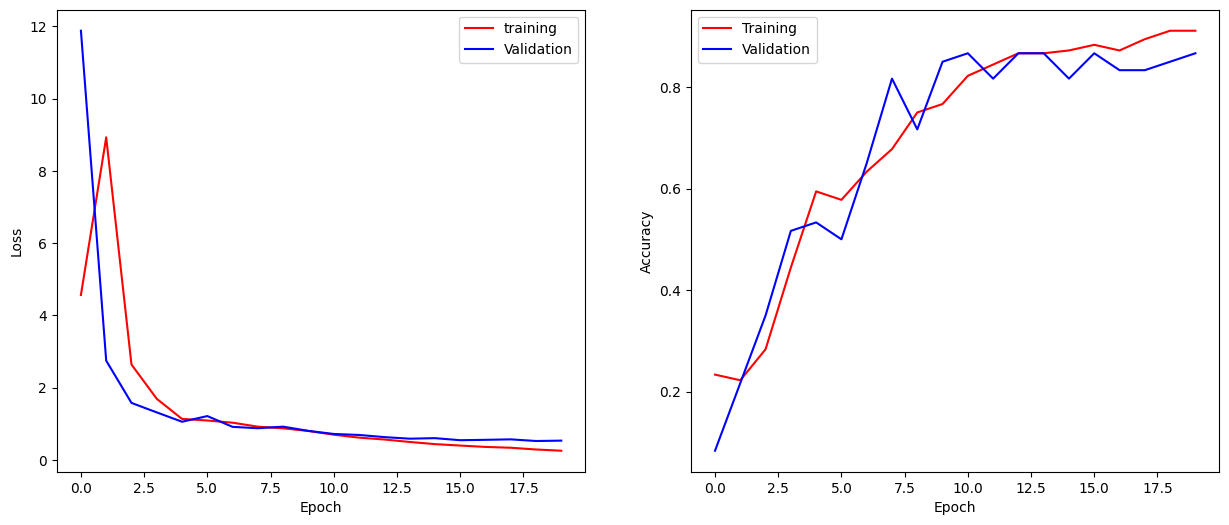

In [ ]:
plot_training_validation(history)

In [ ]:
model.save('model_fruit_detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#let's see if the model is working or not


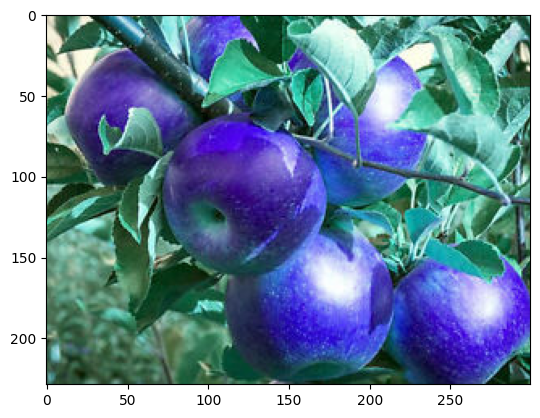

In [ ]:
test_image_name = '/content/drive/MyDrive/DeepLearning/detection_fruit_projet/test_zip/test/apple_77.jpg'
test_image = cv2.imread(test_image_name)
plt.imshow(test_image)

In [3]:
model = load_model('/content/drive/MyDrive/DeepLearning/detection_fruit_projet/model_fruit_classification.h5')

In [ ]:
# Afficher quelques exemples d'images
for i in range(50, 60):
    plt.figure(figsize=(12, 6))

    # Afficher l'image avec le label
    plt.subplot(121)
    plt.imshow(test_images[i])  # Affiche l'image
    plt.title(f'Label: {test_labels[i]}')  # Affiche le label de l'image

    # Faire une prédiction sur l'image
    output = model.predict(np.expand_dims(test_images[i], axis=0))

    # La classe prédite avec la probabilité maximale
    prediction = output[0].argmax()
    print('Predicted class:', prediction, '; True class:', test_labels[i])

    # Afficher les probabilités prédites avec les noms des classes
    plt.subplot(122)
    classes = ['apple', 'banana', 'mixed', 'orange']  # Remplace cela par les noms réels de tes classes
    plt.bar(classes, output[0])
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

#upload new image for classification

In [4]:
from google.colab import files
import io

In [5]:
def upload_and_classify_image(model):
    image_upload = []
    shape = (200, 200, 3)  # Assure-toi que la forme correspond à celle attendue par ton modèle

    uploaded = files.upload()
    for filename, content in uploaded.items():
        img = cv2.imdecode(np.frombuffer(content, np.uint8), -1)
        img = cv2.resize(img, shape[:2])  # Utilise seulement la hauteur et la largeur

        image_upload.append(img)

    # Cast into numpy array
    image_upload = np.array(image_upload)

    # Faire une prédiction sur l'image
    output = model.predict(image_upload)  # Ne pas utiliser np.expand_dims ici

    # Affichage avec matplotlib
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.title("Input image")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Afficher les probabilités prédites avec les noms des classes
    plt.subplot(122)
    classes = ['apple', 'banana', 'mixed', 'orange']  # Remplace cela par les noms réels de tes classes
    plt.bar(range(len(classes)), output.flatten(), tick_label=classes)
    plt.title("Prediction by the model")
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.show()

    # La classe prédite avec la probabilité maximale
    prediction = output.argmax()
    print('Predicted class:', prediction)

Saving banana_79.jpg to banana_79.jpg
1/1 [==============================] - 0s 18ms/step


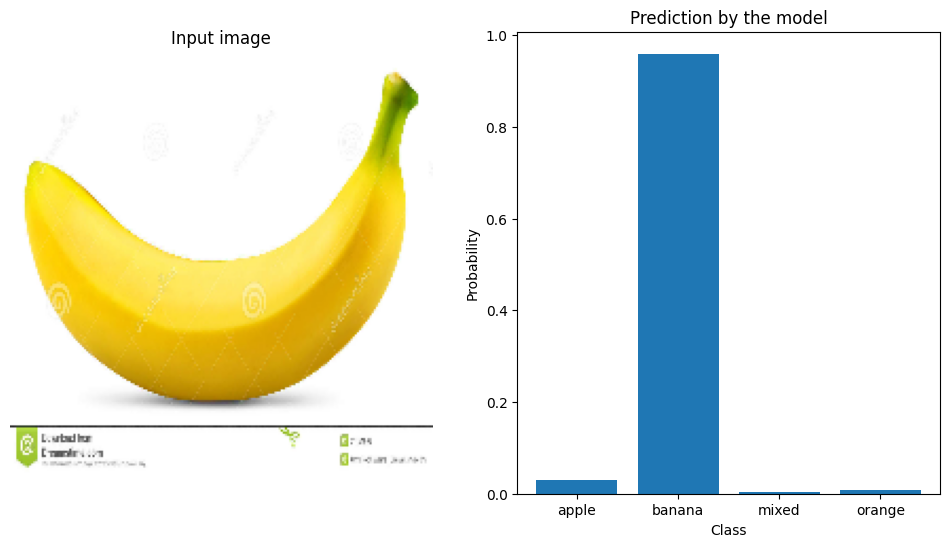

Predicted class: 1


In [8]:
# Exemple d'utilisation:
upload_and_classify_image(model)